In [1]:
import sys
sys.path.insert(0, "../")

import math
import matgraph as mg
import torch

%load_ext autoreload
%autoreload 2

[juliapkg] Locating Julia ^1.6
[juliapkg] Using Julia 1.7.2 at /Applications/Julia-1.7.app/Contents/Resources/julia/bin/julia
[juliapkg] Using Julia project at /Users/londel/Repositories/FAST-ASR/matgraph/matgraphenv/julia_env
[juliapkg] Installing packages:
           julia> import Pkg
           julia> Pkg.add([Pkg.PackageSpec(name="CUDA", uuid="052768ef-5323-5732-b1bb-66c8b64840ba"), Pkg.PackageSpec(name="DLPack", uuid="53c2dc0f-f7d5-43fd-8906-6c0220547083"), Pkg.PackageSpec(name="MarkovModels", uuid="c2ae6250-d0a1-11ea-0991-234599ce5244", url=raw"https://github.com/FAST-ASR/MarkovModels.jl.git", rev=raw"uniqfsm"), Pkg.PackageSpec(name="Semirings", uuid="900aad66-9ca5-44d4-b043-321c62cb7767", rev=raw"main"), Pkg.PackageSpec(name="PythonCall", uuid="6099a3de-0909-46bc-b1f4-468b9a2dfc0d")])
           julia> Pkg.resolve()


    Updating git-repo `https://github.com/FAST-ASR/MarkovModels.jl.git`
    Updating git-repo `https://github.com/FAST-ASR/Semirings.jl.git`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Repositories/FAST-ASR/matgraph/matgraphenv/julia_env/Project.toml`
  No Changes to `~/Repositories/FAST-ASR/matgraph/matgraphenv/julia_env/Manifest.toml`
  No Changes to `~/Repositories/FAST-ASR/matgraph/matgraphenv/julia_env/Project.toml`
  No Changes to `~/Repositories/FAST-ASR/matgraph/matgraphenv/julia_env/Manifest.toml`


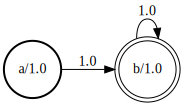

In [2]:
fsm = mg.fsm_from_json("""{
    "semiring": "ProbSemiring{Float32}",
    "initstates": [[1, 1]],
    "arcs": [[1, 2, 1], [2, 2, 1]],
    "finalstates": [[2, 1]],
    "labels": ["a", "b"]
}""")
fsm

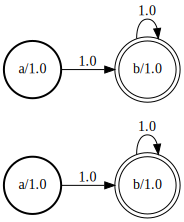

In [3]:
mg.union(fsm, fsm)

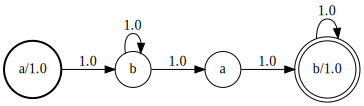

In [4]:
mg.jl.cat(fsm, fsm)

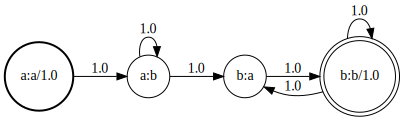

In [5]:
mg.compose(fsm, [fsm, fsm], ":")

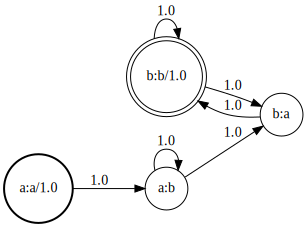

In [8]:
mg.determinize(mg.compose(fsm, [fsm, fsm], sep=":"))

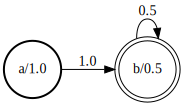

In [7]:
mg.renorm(mg.propagate(fsm))